# TE Image processing

Import the necessary modules and activate inline plotting.

In [48]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

Define two functions for displaying images and plotting histograms.

In [49]:
def show(img):
    # check if the image is color (dim=3) or black and white (dim=2)
    if len(img.shape)==3:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plot = plt.imshow(img2)
    else:
        plot = plt.imshow(img, cmap='gray')
    # place the x-axis labels at the top
    plt.tick_params(bottom=False, top=True, labelbottom=False, labeltop=True)

In [50]:
def histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

## 6 Image processing

(300, 300, 3)


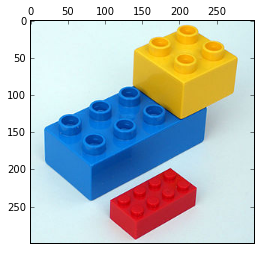

In [51]:
img = cv2.imread("bricks.jpg")
print(img.shape)
show(img)

What is the BGR value of pixle at position p0 = (100, 200)?

In [52]:
p0 = (200, 100)


In [53]:
(b,g,r)=img[200, 100]
print("the blue value:", b,";gree value:",g,";red value:",r)

the blue value: 149 ;gree value: 66 ;red value: 4


Make a copy of `img` and add a red circle of with center=p0, radius=20, and thickness=2.

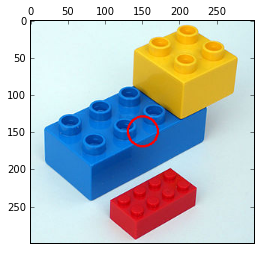

In [54]:
img2 = img.copy()
img2 = cv2.circle(img2,(150,150),20,(0,0,255),2 )


show(img2)

## 7 Histograms

Transform the color image to a gray-scale image and show it.

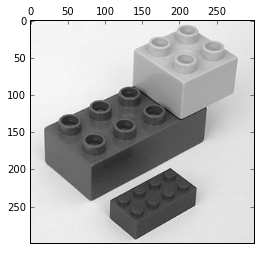

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

Show a false-color image to better read the gray-scale values.

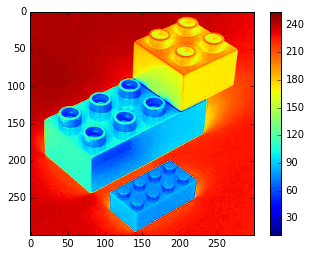

In [56]:
plot = plt.imshow(gray)
plt.colorbar();


Create a histogramm for the grayscale image `gray`.

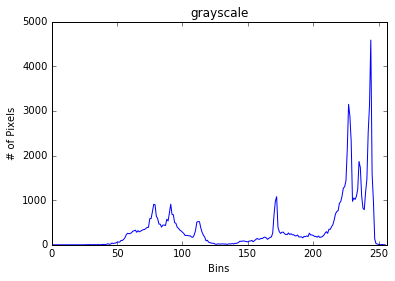

In [57]:
hist = cv2.calcHist([gray],[0],None,[256],(0,256))
histogram(hist, "grayscale")

Look at the false-color grayscale image and explain the seven peaks at 
- 75
- 90
- 110
- 170
- 220
- 230
- 240

## Split into RGB colors

Split the image into its 3 color components (b, g, r). Show b.

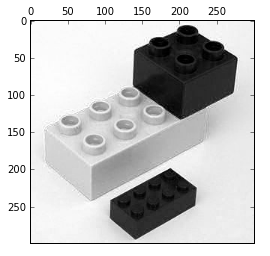

In [58]:
(b, g, r) = cv2.split(img)
show(b)


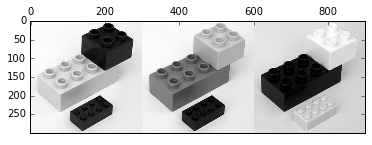

In [59]:
bgr = np.hstack([b,g,r])
show(imgbgr)

Horizontally stack the 3 images (b, g, r) and call the result `bgr`.

Create a zero-filled np.array `z` whith the same dimensions as `gray`. Use it to create a 
- blue imgage B from b
- green image G from g
- red image R from r

Horizontally stack the (B, G, R) images and call the result `BGR`.

## 8 Smoothing

Extract a 80x80 region at point (100, 80) and call it `img2`

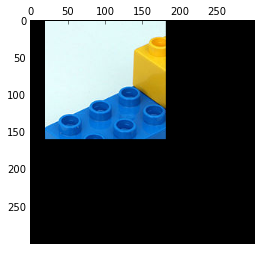

In [89]:
ma= np.zeros((300,300,3), "uint8")


cv2.rectangle(ma,(180,160),(20,0),(255,255,255),-1)

img2 = cv2.bitwise_and(img,ma,ma)
show(img2)

Show 3 horizontally stacked Gaussian blurred images of `img2` with a blur size of 3, 5, 7

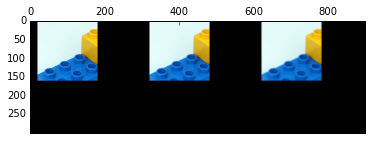

In [90]:
blur3= cv2.GaussianBlur(img2, (3,3), 0)
blur5= cv2.GaussianBlur(img2, (5,5), 0)
blur7= cv2.GaussianBlur(img2, (7,7), 0)

troisimg= np.hstack([blur3,blur5,blur7])
show(troisimg)

## 9 Thresholding

Use the blue component `b` of the image and compute the inverse binary with a simple threshold of T=100, to obtain a mask which only shows the blue and the red brick.

Use `bitwise_and` to show only the red and yellow brick.

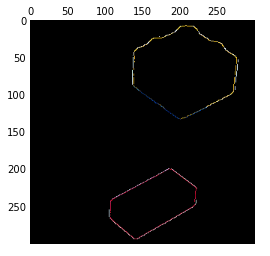

In [71]:
blur = cv2.blur(b, (5, 5))
canny = cv2.Canny(blur, 200, 250)


andimg =cv2.bitwise_and(img,img, mask=canny)
show(andimg)

## 10 Edge detection

The blue color component `b` has the higest image contrast. So we use this image for edge detection of the yellow and red brick.

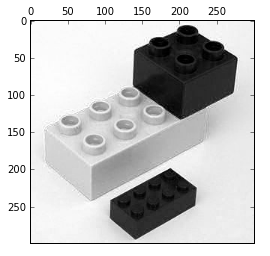

In [62]:
show(b)

Blur the grayscale image `b` by an appropriate amount, then use Canny edge detection to extract the contours of the red and yellow brick.